# **Proyecto Final Inteligencia Computacional: Clasificador de actividades físicas**
**Nombre:** José Luis Cádiz

**ReadMe:** Ejecutar todo el código, si se ejecuta solo una parte aislada pueden existir errores producto de que hay variables que se sobreescriben. 

# **Introducción:**

**En el contexto del curso ''Inteligencia Computacional'', se presentará a continuación el desarrollo del proyecto final del curso. Esta proyecto pretende implementar un clasificador de actividades físicas basado en mediciones medidas con una IMU de personas realizando diferentes actividades físicas (6 clases de movimientos). Las señales a hacer analizadas serán 9, 3 total acc, 3  body gyro y 3 body acc. Se utilizará una 
versión modificada de la base de datos Human Activity Recognition Using Smartphones Data Set y se usarán las librerías pandas, numpy, matplotlib, seaborn y scikit-learn para manipular, procesar, graficar los datos y entrenar los clasificadores estadísticos.**

**A continuación se explica a grandes razgos lo que se realizará en este proyecto: En la parte 1, se leerá el conjunto de señales de entrenamiento, validación y prueba. Señales a las cuales se les calcularán carácteristicas para generar los datos de entrenamientos, validación y prueba.**

**En la parte 2, se grafican algunas señales del conjunto de datos con el objetivo de facilitar la comprensión del problema.**

**En la parte 3, se investiga el aporte de cada señal para decidir cuales aportan en el accuracy del clasificador.**

**En la parte 4, se evaluará aplicar algún tipo de filtro a las señales con el objetivo de mejorar el rendimiento.**

**En la parte 5, se definiran las carácteristicas a ser implementadas en cada señal.**

**En la parte 6, se implementarán métodos de selección de carácteristicas, siempre y cuando esta selección mejore el rendimiento del clasificador.**

**En la parte 7, se graficarán clusters sobre un espacio de 2 dimensiones usando PCA para apreciar graficamente el efecto de la selección de carácteristicas.**

**En la parte 8, se entrenarán dos clasificadores, un Random Forest y un SVM lineal.**


**En la parte 9, se aplicará el mejor clasificador obtenido sobre el conjunto de prueba. Resultados que serán subidos a Kaggle.**

**Finalmente, se termina el documento con las conclusiones principales del proyecto.**

# **Metodología:**

**La metodología a seguir será en primer lugar, familiarizarse con el problema graficando algunas señales. Para decidir que señales no aportan información relevante para la correcta clasificación se eliminarán las señales cuyos graficos sean muy similares a otras señales, ya que seria redudante calcular la misma información 2 veces.** 

**Con las señales seleccionadas, se procede a elegir un filtro pasa bajos adecuado que permita eliminar el ruido.**

**Luego se procederá a calcular las carácteristicas de cada señal, en este caso por simplicidad de calculo se eligieron: Mean, Variance, Min, Max, Range, Skew y Kurtosis.**

**Posteriomente, se procede a armar los conjuntos de entrenamiento, validación y prueba, obteniendose data con 42 columnas, producto de que a cada tipo de señal (9 en total) se les calcula 7 carácteristicas.**

**Una vez obtenidos los conjuntos, se procede a normalizar los datos, con el objetivo de que ninguna carácteristica tenga más importancia que otra debido a las eventuales diferencias de magnitudes entre estas.**


**Luego, se aplicará un método de selección de carácteristicas, el cual será usado siempre y cuando mejoré el rendimiento de los clasificadores.**

**Ya con la data bien estructurada, se entrenará un Random Forest y un SVM lineal. De estos clasificadores, se eligirá el mejor de modo de ser aplicado en el conjunto de prueba.**



In [ ]:
#Importando librerias:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Libreria sklearn:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#Para el calculo de tiempos de entrenamiento:
import time

#Importar datos desde google drive:
from google.colab import drive  #Se uso para no subir el archivo cada vez que se avanzaba en la tarea
drive.mount('/content/drive')

Mounted at /content/drive


**Item 1**: Lectura de datos.

In [ ]:
# Lectura de la Base de Datos:

# Señales de entrenamiento:

path1e = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_z_entrenamiento.csv' 
s1_e=pd.read_csv(path1e)
path2e = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_y_entrenamiento.csv' 
s2_e=pd.read_csv(path2e)
path3e = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_x_entrenamiento.csv' 
s3_e=pd.read_csv(path3e)
path4e = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_z_entrenamiento.csv' 
s4_e=pd.read_csv(path4e)
path5e = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_y_entrenamiento.csv' 
s5_e=pd.read_csv(path5e)
path6e = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_x_entrenamiento.csv' 
s6_e=pd.read_csv(path6e)
path7e = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_z_entrenamiento.csv' 
s7_e=pd.read_csv(path7e)
path8e = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_y_entrenamiento.csv' 
s8_e=pd.read_csv(path8e)
path9e = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_x_entrenamiento.csv' 
s9_e=pd.read_csv(path9e)

# Señales de validación:

path1v = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_z_validacion.csv' 
s1_v=pd.read_csv(path1v)
path2v = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_y_validacion.csv' 
s2_v=pd.read_csv(path2v)
path3v = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_x_validacion.csv' 
s3_v=pd.read_csv(path3v)
path4v = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_z_validacion.csv' 
s4_v=pd.read_csv(path4v)
path5v = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_y_validacion.csv' 
s5_v=pd.read_csv(path5v)
path6v = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_x_validacion.csv' 
s6_v=pd.read_csv(path6v)
path7v = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_z_validacion.csv' 
s7_v=pd.read_csv(path7v)
path8v = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_y_validacion.csv' 
s8_v=pd.read_csv(path8v)
path9v = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_x_validacion.csv' 
s9_v=pd.read_csv(path9v)

# Señales de prueba:

path1p = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_z_prueba.csv' 
s1_p=pd.read_csv(path1p)
path2p = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_y_prueba.csv' 
s2_p=pd.read_csv(path2p)
path3p = 'drive/My Drive/Inteligencia Computacional/datos/total_acc_x_prueba.csv' 
s3_p=pd.read_csv(path3p)
path4p = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_z_prueba.csv' 
s4_p=pd.read_csv(path4p)
path5p = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_y_prueba.csv' 
s5_p=pd.read_csv(path5p)
path6p = 'drive/My Drive/Inteligencia Computacional/datos/body_gyro_x_prueba.csv' 
s6_p=pd.read_csv(path6p)
path7p = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_z_prueba.csv' 
s7_p=pd.read_csv(path7p)
path8p = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_y_prueba.csv' 
s8_p=pd.read_csv(path8p)
path9p = 'drive/My Drive/Inteligencia Computacional/datos/body_acc_x_prueba.csv' 
s9_p=pd.read_csv(path9p)

# Labels:
pathe = 'drive/My Drive/Inteligencia Computacional/datos/y_entrenamiento.csv' 
y_train=pd.read_csv(pathe)
pathv = 'drive/My Drive/Inteligencia Computacional/datos/y_validacion.csv' 
y_val=pd.read_csv(pathv)


**Item 2**: Grafico de Señales.

**A continuación se grafican 2 ejemplos de las 9 señales con el objetivo de familiarizarse con el problema.**

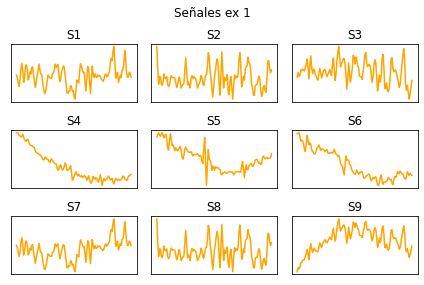

In [ ]:
# Grafico de señales:

# Se extrae la señal de indice 5 (arbitrario) para cada tipo de señal del conjunto de señales de entrenamiento.
g1=s1_e.iloc[5]
g2=s2_e.iloc[5]
g3=s3_e.iloc[5]
g4=s4_e.iloc[5]
g5=s5_e.iloc[5]
g6=s6_e.iloc[5]
g7=s7_e.iloc[5]
g8=s8_e.iloc[5]
g9=s9_e.iloc[5]

# Subplot con 9 figuras (1 para cada tipo de señal).

fig,axs = plt.subplots(3, 3)
fig.suptitle('Señales ex 1')
axs[0, 0].plot(g1,'orange')
axs[0, 0].set_title('S1')
axs[0, 1].plot(g2,'orange')
axs[0, 1].set_title('S2')
axs[0, 2].plot(g3,'orange')
axs[0, 2].set_title('S3')
axs[1, 0].plot(g4,'orange')
axs[1, 0].set_title('S4')
axs[1, 1].plot(g5,'orange')
axs[1, 1].set_title('S5')
axs[1, 2].plot(g6,'orange')
axs[1, 2].set_title('S6')
axs[2, 0].plot(g7,'orange')
axs[2, 0].set_title('S7')
axs[2, 1].plot(g8,'orange')
axs[2, 1].set_title('S8')
axs[2, 2].plot(g9,'orange')
axs[2, 2].set_title('S9')
# Configurando la disposición de los gráficos.
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]) # Se eliminan los ejes
plt.tight_layout() # Se corrige superposición de gráficos.
fig.subplots_adjust(top=0.85) # Se corrige superposición de titulo con los subtitulos.
plt.show()

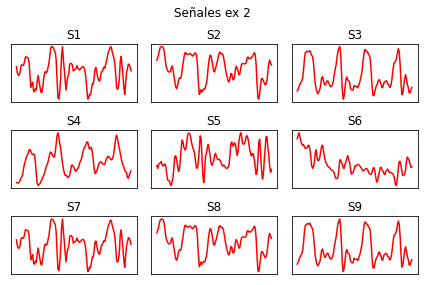

In [ ]:
# Grafico de señales:
# Se extrae la señal de indice 1000 (arbitrario) para cada tipo de señal del conjunto de señales de entrenamiento.
g1=s1_e.iloc[1000]
g2=s2_e.iloc[1000]
g3=s3_e.iloc[1000]
g4=s4_e.iloc[1000]
g5=s5_e.iloc[1000]
g6=s6_e.iloc[1000]
g7=s7_e.iloc[1000]
g8=s8_e.iloc[1000]
g9=s9_e.iloc[1000]
fig,axs = plt.subplots(3, 3)
fig.suptitle('Señales ex 2')
axs[0, 0].plot(g1,'red')
axs[0, 0].set_title('S1')
axs[0, 1].plot(g2,'red')
axs[0, 1].set_title('S2')
axs[0, 2].plot(g3,'red')
axs[0, 2].set_title('S3')
axs[1, 0].plot(g4,'red')
axs[1, 0].set_title('S4')
axs[1, 1].plot(g5,'red')
axs[1, 1].set_title('S5')
axs[1, 2].plot(g6,'red')
axs[1, 2].set_title('S6')
axs[2, 0].plot(g7,'red')
axs[2, 0].set_title('S7')
axs[2, 1].plot(g8,'red')
axs[2, 1].set_title('S8')
axs[2, 2].plot(g9,'red')
axs[2, 2].set_title('S9')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout() 
fig.subplots_adjust(top=0.85)
plt.show()

**A priori se ven que hay señales que tienen formar muy parecidas, este análisis se hará en más detalle en el siguiente item.**

**Item 3**: Aporte de cada señal.

**En este item se graficarán las 9 señales para cada tipo de actividad física. Esto con el objetivo de ver si hay alguna señal que no aporte información, para esto se verá si las curvas son iguales o diferentes entre si.**

**Si son iguales, esto quiere decir que esa señal no aporta información por lo que será eliminada del conjunto.**

**Se grafican las señales para cada tipo de movimiento de modo de observar señales que contengan el mismo tipo de información.**

In [ ]:
# Se extrae el primer índice asociado a cada clasificación de movimiento con el objetivo de saber que señales estan asociadas a cada tipo de movimiento.
ind6=y_train.loc[y_train['Category']==6].reset_index(drop=True)['Id'].iloc[0]
ind5=y_train.loc[y_train['Category']==5].reset_index(drop=True)['Id'].iloc[0]
ind4=y_train.loc[y_train['Category']==4].reset_index(drop=True)['Id'].iloc[0]
ind3=y_train.loc[y_train['Category']==3].reset_index(drop=True)['Id'].iloc[0]
ind2=y_train.loc[y_train['Category']==2].reset_index(drop=True)['Id'].iloc[0]
ind1=y_train.loc[y_train['Category']==1].reset_index(drop=True)['Id'].iloc[0]

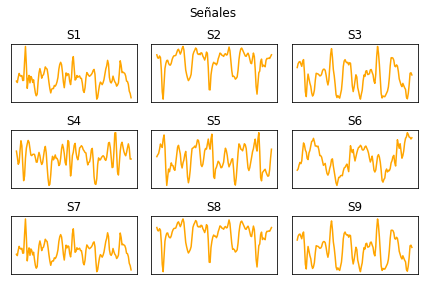

In [ ]:
# Grafico de señales:
# En este caso se observa las señales para el caso de la categoria 1, sin embargo también se hizo para las otras categorias.
g1=s1_e.iloc[ind1]
g2=s2_e.iloc[ind1]
g3=s3_e.iloc[ind1]
g4=s4_e.iloc[ind1]
g5=s5_e.iloc[ind1]
g6=s6_e.iloc[ind1]
g7=s7_e.iloc[ind1]
g8=s8_e.iloc[ind1]
g9=s9_e.iloc[ind1]
fig,axs = plt.subplots(3, 3)
fig.suptitle('Señales')
axs[0, 0].plot(g1,'orange')
axs[0, 0].set_title('S1')
axs[0, 1].plot(g2,'orange')
axs[0, 1].set_title('S2')
axs[0, 2].plot(g3,'orange')
axs[0, 2].set_title('S3')
axs[1, 0].plot(g4,'orange')
axs[1, 0].set_title('S4')
axs[1, 1].plot(g5,'orange')
axs[1, 1].set_title('S5')
axs[1, 2].plot(g6,'orange')
axs[1, 2].set_title('S6')
axs[2, 0].plot(g7,'orange')
axs[2, 0].set_title('S7')
axs[2, 1].plot(g8,'orange')
axs[2, 1].set_title('S8')
axs[2, 2].plot(g9,'orange')
axs[2, 2].set_title('S9')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout() 
fig.subplots_adjust(top=0.85)
plt.show()

**Se probo para cada tipo de movimiento si es es que efectivamente la similitud es para todos los tipos de movimiento, lo cual efectivamente es así.**

**S1 y S7,S2 y s8, y S3 y S9  son similares, a continuación se verifica esto con gráficos 1vs1.**

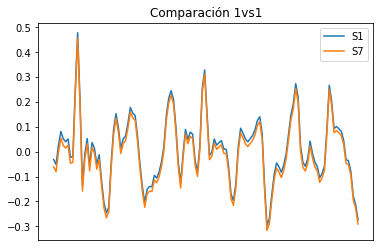

In [ ]:
# S1 vs S7
plt.plot(g1)
plt.plot(g7)
plt.title('Comparación 1vs1')
plt.legend(["S1", "S7"], loc ="upper right")
plt.xticks([])
#plt.ylim(-2,1)
plt.show()

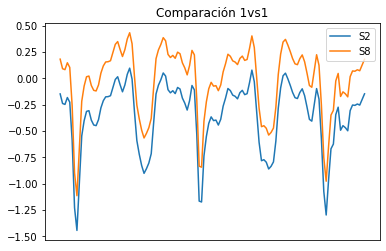

In [ ]:
# S2 vs S8
plt.plot(g2)
plt.plot(g8)
plt.title('Comparación 1vs1')
plt.legend(["S2", "S8"], loc ="upper right")
plt.xticks([])
#plt.ylim(-2,1)
plt.show()

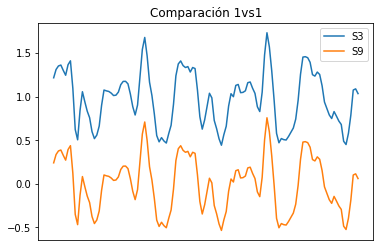

In [ ]:
# S3 vs S9
plt.plot(g3)
plt.plot(g9)
plt.title('Comparación 1vs1')
plt.legend(["S3", "S9"], loc ="upper right")
plt.xticks([])
#plt.ylim(-1,2)
plt.show()

**Finalmente se decide eliminar las señales 7,8 y 9.**

**Estas señales son: body_acc_z, body_acc_y, body_acc_x.**

**Item 4**: Filtrado de señales.

**Para saber que filtro usar, se verán los espectros de algunas señales.**

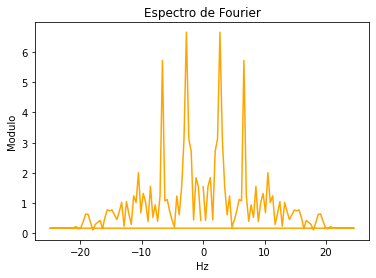

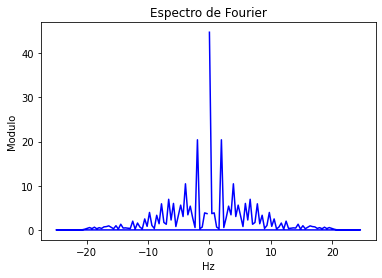

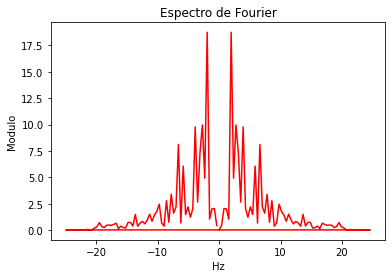

In [ ]:
Fs=50 #Frecuencia de muestreo
# Gráfico 1:
y=abs(np.fft.fft(g1)) # Modulo del espectro
freq=np.fft.fftfreq(len(g1))*Fs # Frecuencias asociadas
plt.plot(freq,y,'orange')
plt.title('Espectro de Fourier')
plt.ylabel('Modulo')
plt.xlabel('Hz')
plt.show()
# Gráfico 2:
y=abs(np.fft.fft(g2))
freq=np.fft.fftfreq(len(g2))*50
plt.plot(freq,y,'blue')
plt.title('Espectro de Fourier')
plt.ylabel('Modulo')
plt.xlabel('Hz')
plt.show()
# Gráfico 3:
y=abs(np.fft.fft(g9))
freq=np.fft.fftfreq(len(g9))*Fs
plt.plot(freq,y,'red')
plt.title('Espectro de Fourier')
plt.ylabel('Modulo')
plt.xlabel('Hz')
plt.show()

**Iterando sobre el filtro en función del accuracy se determino que la frecuencia de corte optima es de 10[Hz].**

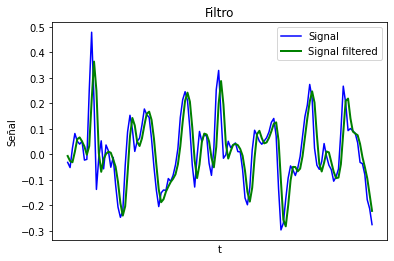

In [ ]:
# Filtro preliminar:
import scipy
from scipy.signal import butter,lfilter
order = 2 # Filtro de orden 2
signal = g1 # Señal a filtrar
sampling_freq = 50 # Frecuenncia de muestreo
cutoff_freq = 10 # Frecuencia de corte
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = butter(order, normalized_cutoff_freq)
filtered_signal = lfilter(numerator_coeffs, denominator_coeffs, signal)

# Gráfico de señal sin filtrar v/s señal filtrada.
plt.plot(signal, 'b-', label='signal')
plt.plot(filtered_signal, 'g-', linewidth=2, label='filtered signal')
plt.xticks([])
plt.legend(["Signal", "Signal filtered"], loc ="upper right")
plt.title('Filtro')
plt.ylabel('Señal')
plt.xlabel('t')
plt.show()


In [ ]:
# Listas para iterar los filtros sobre cada conjunto:
filtrar1=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
filtrar2=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
filtrar3=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]

In [ ]:
# Filtro para señales de entrenamiento:
for señales in filtrar1:
  for i in range(2800):
    señales.loc[i]=lfilter(numerator_coeffs, denominator_coeffs, señales.loc[i])

In [ ]:
# Filtro para señales de validación:
for señales in filtrar2:
  for i in range(2000):
    señales.loc[i]=lfilter(numerator_coeffs, denominator_coeffs, señales.loc[i])

In [ ]:
# Filtro para señales de prueba:
for señales in filtrar3:
  for i in range(2000):
    señales.loc[i]=lfilter(numerator_coeffs, denominator_coeffs, señales.loc[i])

**Item 5**: Definición de características.

**Las características serán: Mean (M), Variance (V), Min (Mi), Max (Ma), Range (R), Skew (S), Kurtosis (K) para las 6 señales elegidas en el item 3.**

**Se procede a armar la data creando DataFrame´s vacíos que contendrán las características.**

In [ ]:
# Datos de entrenamiento:
Data_E = pd.DataFrame(columns=[])

In [ ]:
# Mean:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e] # Lista de conjunto de señales de entrenamiento
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals): #Se itera sobre la lista de conjuntos y se además se obtiene su índice.
  lista=[]
  for i in range(2800): # A cada señal se le calcula la métrica correspondiente.
    s=signal.iloc[i]
    mean=np.mean(s) # Calculo de la métrica.
    lista.append(mean) # la métrica se guarda en lista.
  df=np.array(lista) # Una vez llena la lista, se transforma en un Data Frame.
  Data_E[names[ind]+'_M']=df # Se agrega una columna a Data_E por la métrica calculada a cada tipo de señal (6 en total).
  

**Análogamente se usa el código anteriormente explicado para calcular las demás métricas, repitiendose esto para los conjuntos de validación y de prueba.**

In [ ]:
# Variance:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    var=np.var(s)
    lista.append(var)
  df=np.array(lista)
  Data_E[names[ind]+'_V']=df

In [ ]:
# Min:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    min=np.min(s)
    lista.append(min)
  df=np.array(lista)
  Data_E[names[ind]+'_Mi']=df

In [ ]:
# Max:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    max=np.max(s)
    lista.append(max)
  df=np.array(lista)
  Data_E[names[ind]+'_Ma']=df

In [ ]:
# Range:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    rango=np.max(s)-np.min(s)
    lista.append(rango)
  df=np.array(lista)
  Data_E[names[ind]+'_R']=df

In [ ]:
# Kurtosis:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    kurt=s.kurtosis(axis=None, skipna=None, level=None, numeric_only=None)
    lista.append(kurt)
  df=np.array(lista)
  Data_E[names[ind]+'_K']=df

In [ ]:
import scipy.stats as sp  
# Skew:
signals=[s1_e,s2_e,s3_e,s4_e,s5_e,s6_e]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2800):
    s=signal.iloc[i]
    skew=sp.skew(s)
    lista.append(skew)
  df=np.array(lista)
  Data_E[names[ind]+'_SK']=df

In [ ]:
# Datos de validación:
Data_V = pd.DataFrame(columns=[])

In [ ]:
# Mean:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    mean=np.mean(s)
    lista.append(mean)
  df=np.array(lista)
  Data_V[names[ind]+'_M']=df
  

In [ ]:
# Variance:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    var=np.var(s)
    lista.append(var)
  df=np.array(lista)
  Data_V[names[ind]+'_V']=df

In [ ]:
# Min:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    min=np.min(s)
    lista.append(min)
  df=np.array(lista)
  Data_V[names[ind]+'_Mi']=df

In [ ]:
# Max:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    max=np.max(s)
    lista.append(max)
  df=np.array(lista)
  Data_V[names[ind]+'_Ma']=df

In [ ]:
# Range:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    rango=np.max(s)-np.min(s)
    lista.append(rango)
  df=np.array(lista)
  Data_V[names[ind]+'_R']=df

In [ ]:
# Kurtosis:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    kurt=s.kurtosis(axis=None, skipna=None, level=None, numeric_only=None)
    lista.append(kurt)
  df=np.array(lista)
  Data_V[names[ind]+'_K']=df

In [ ]:
import scipy.stats as sp  
# Skew:
signals=[s1_v,s2_v,s3_v,s4_v,s5_v,s6_v]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    skew=sp.skew(s)
    lista.append(skew)
  df=np.array(lista)
  Data_V[names[ind]+'_SK']=df

In [ ]:
# Datos de prueba:
Data_P = pd.DataFrame(columns=[])

In [ ]:
# Mean:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    mean=np.mean(s)
    lista.append(mean)
  df=np.array(lista)
  Data_P[names[ind]+'_M']=df
  

In [ ]:
# Variance:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    var=np.var(s)
    lista.append(var)
  df=np.array(lista)
  Data_P[names[ind]+'_V']=df

In [ ]:
# Min:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    min=np.min(s)
    lista.append(min)
  df=np.array(lista)
  Data_P[names[ind]+'_Mi']=df

In [ ]:
# Max:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    max=np.max(s)
    lista.append(max)
  df=np.array(lista)
  Data_P[names[ind]+'_Ma']=df

In [ ]:
# Range:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    rango=np.max(s)-np.min(s)
    lista.append(rango)
  df=np.array(lista)
  Data_P[names[ind]+'_R']=df

In [ ]:
# Kurtosis:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    kurt=s.kurtosis(axis=None, skipna=None, level=None, numeric_only=None)
    lista.append(kurt)
  df=np.array(lista)
  Data_P[names[ind]+'_K']=df

In [ ]:
import scipy.stats as sp  
# Skew:
signals=[s1_p,s2_p,s3_p,s4_p,s5_p,s6_p]
names=['s1','s2','s3','s4','s5','s6']
for ind,signal in enumerate(signals):
  lista=[]
  for i in range(2000):
    s=signal.iloc[i]
    skew=sp.skew(s)
    lista.append(skew)
  df=np.array(lista)
  Data_P[names[ind]+'_SK']=df

**Una vez la data armada, se procede a normalizar los datos.**

In [ ]:
# Normalización de los datos:

# Entrenamiento de StandardScaler:
features=Data_E.columns.values
scaler = StandardScaler().fit(Data_E)


# Escalamiento:
Data_E = pd.DataFrame(scaler.transform(Data_E))
Data_V = pd.DataFrame(scaler.transform(Data_V))
Data_P = pd.DataFrame(scaler.transform(Data_P))


# Volvemos a insertar nombre de columnas, producto de que scaler entrega un array, perdiendose la información del nombre de las columnas:
Data_E.set_axis(features, axis=1, inplace=True)
Data_V.set_axis(features, axis=1, inplace=True)
Data_P.set_axis(features, axis=1, inplace=True)


**Item 6**: Selección de caracteristicas.

In [ ]:
# Método filtro:

# Seleccion de mejores 20 features:
select=SelectKBest(k=20).fit(Data_E,y_train['Category']) #Entrenamiento para la selección
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature2=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature2))


Finalmente las features seleccionadas son: ['s3_M', 's3_V', 's3_Mi', 's4_Mi', 's5_Mi', 's6_Mi', 's3_Ma', 's4_Ma', 's5_Ma', 's6_Ma', 's1_R', 's2_R', 's3_R', 's4_R', 's5_R', 's6_R', 's1_K', 's2_K', 's3_K', 's3_SK']


**Se itero sobre varias alternativas para mejorar el rendimiento pero en ningún caso se logró mejorar, por lo que finalmente nos quedamos con todas las carácteristicas calculadas desde un principio.**

In [ ]:
# Actualización de carácteristicas. (No se uso)
# Data_E=Data_E[new_feature2]
# Data_V=Data_V[new_feature2]
# Data_P=Data_P[new_feature2]

**Item 7**: Clusters.

**Primero, se graficarán las clases reales aplicando PCA al conjunto completo de carácteristicas.**

In [ ]:
# PCA a Datos:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(Data_E)
Data_pca=pca.transform(Data_E)

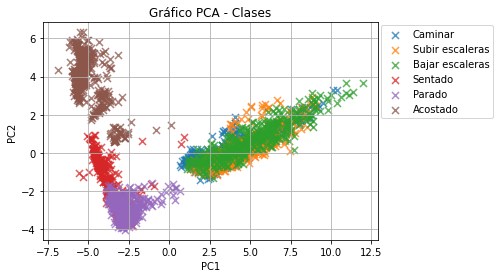

In [ ]:
class1=np.where(y_train['Category']==1)[0] #Indices donde y_train['Category']=1
class2=np.where(y_train['Category']==2)[0]
class3=np.where(y_train['Category']==3)[0]
class4=np.where(y_train['Category']==4)[0]
class5=np.where(y_train['Category']==5)[0]
class6=np.where(y_train['Category']==6)[0]
colors=["b","g","r","c","m","y"]
clases=[class1,class2,class3,class4,class5,class6]
labels=["Caminar","Subir escaleras","Bajar escaleras","Sentado","Parado","Acostado"]
i=0
for color,index in zip(colors,clases):
  plt.scatter(Data_pca[index,0],Data_pca[index,1], label=labels[i],marker='x',s=50,alpha=0.75)
  i+=1
plt.legend(bbox_to_anchor=(1.36, 1.009), loc='upper right')
plt.grid()
plt.title('Gráfico PCA - Clases')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Segundo, se graficarán los clusters aplicando PCA al conjunto
 con reducción de carácteristicas.**

In [ ]:
# PCA a Datos:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(Data_E[new_feature2])
Data_pca=pca.transform(Data_E[new_feature2])

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN().fit(Data_pca)
z=clustering.labels_

# Clusters:
x=pd.DataFrame(clustering.labels_)
x.set_axis(['cluster'], axis=1, inplace=True)
cluster_group=x['cluster'].unique().tolist()
print(cluster_group)

[0, 1, -1]


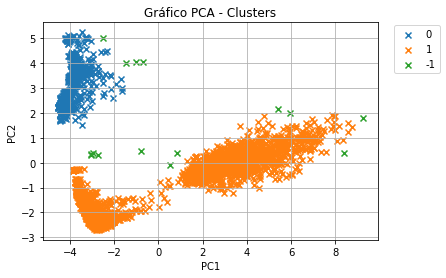

In [ ]:
class0=np.where(z==0)[0] 
class1=np.where(z==1)[0] 
class11=np.where(z==-1)[0]

colors=["b","g","r"]
clases=[class0,class1,class11]
labels=["0","1","-1"]
i=0
for color,index in zip(colors,clases):
  plt.scatter(Data_pca[index,0],Data_pca[index,1], label=labels[i],marker='x')
  i+=1
plt.legend(bbox_to_anchor=(1.2, 1.009), loc='upper right')
plt.grid()
plt.title('Gráfico PCA - Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Del gráfico anterior, se observa que la reducción de carácteristicas no es efectiva para separar las clases correctamente.**

**Item 8**: Clasificadores.

**Random Forest:**

In [ ]:
# Entrenamiento:
#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Data_E,Data_V])
Entre_Vali_label=pd.concat([y_train['Category'],y_val['Category']])

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Data_E),-1)
Vali_indice=np.full(len(Data_V),0)
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

#Grilla:
arboles={'n_estimators':[50,100,150,200,250]}
model4=RandomForestClassifier(random_state=0)
clf4=GridSearchCV(model4,arboles,cv=x)

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf4.fit(Entre_Vali,Entre_Vali_label) 

df=pd.DataFrame(clf4.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_n_estimators','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf4.best_params_)

#Reentrenamiento:
best_param=clf4.best_params_['n_estimators']
model4=RandomForestClassifier(n_estimators=best_param,random_state=0)
#Entrenamiento de parámetros del clasificador:
clf4=model4.fit(Data_E,y_train['Category']) 

#Tiempo final:
T2=time.time()
T4=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T4)+'[s]')


Tabla Resumen:

  param_n_estimators  mean_test_score
0                 50           0.8720
1                100           0.8765
2                150           0.8795
3                200           0.8800
4                250           0.8790

Mejor Parámetro:

{'n_estimators': 200}

Tiempo de Entrenamiento: 16.03001046180725[s]



Clasificación del Conjunto de Validación:

Accuracy: 0.88



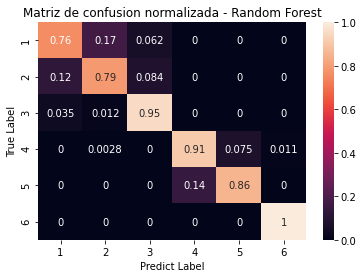

In [ ]:
# Clasificación conjunto de validación:

# Clasificación del conjunto de validación con clasificador Random Forest:
y_pred=pd.DataFrame(clf4.predict(Data_V)) # Usado para calcular la matriz de confusion
y_true=y_val['Category'] # Clasificación true, usado para calcular la matriz de confusion
print('')
print('Clasificación del Conjunto de Validación:')
print('')

# Datos de la matriz de confusión:
Confusion=pd.DataFrame(confusion_matrix(y_true, y_pred,normalize='true'),columns=[1,2,3,4,5,6],index=[1,2,3,4,5,6])

# Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

# Accuracy:
Accuracy4= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy4))
print('')

**SVM:**

In [ ]:
# Entrenamiento: 
#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Data_E,Data_V])
Entre_Vali_label=pd.concat([y_train['Category'],y_val['Category']])

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Data_E),-1)
Vali_indice=np.full(len(Data_V),0)
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
C=[0.0001, 0.001, 0.1]
model0=svm.SVC(kernel='linear', probability=False)    #linear, poly, rbf
clf0=GridSearchCV(model0,{'C':C},cv=x) 

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf0.fit(Entre_Vali,Entre_Vali_label) 

df=pd.DataFrame(clf0.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_C','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf0.best_params_)

#Reentrenamiento:
best_param=clf0.best_params_['C']
model0=svm.SVC(kernel='linear',C=best_param,probability=False)
#Entrenamiento de parámetros del clasificador:
clf0=model0.fit(Data_E,y_train['Category']) 

#Tiempo final:
T2=time.time()
T00=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T00)+'[s]')

Tabla Resumen:

  param_C  mean_test_score
0  0.0001           0.5460
1   0.001           0.7705
2     0.1           0.8410

Mejor Parámetro:

{'C': 0.1}

Tiempo de Entrenamiento: 1.9438674449920654[s]



Clasificación del Conjunto de Validación:

Accuracy: 0.841



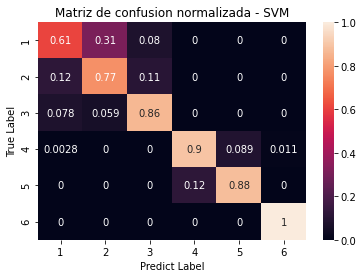

In [ ]:
# Clasificación conjunto de validación:

#Clasificación del conjunto de validación con clasificador SVM:
y_pred=pd.DataFrame(clf0.predict(Data_V)) # Usado para calcular la matriz de confusion
y_true=y_val['Category'] # Clasificación true, usado para calcular la matriz de confusion
print('')
print('Clasificación del Conjunto de Validación:')
print('')

# Datos de la matriz de confusión:
Confusion=pd.DataFrame(confusion_matrix(y_true, y_pred,normalize='true'),columns=[1,2,3,4,5,6],index=[1,2,3,4,5,6])

# Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

# Accuracy:
Accuracy4= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy4))
print('')


**Finalmente, el mejor clasificador es el Random Forest.**

**Item 9**: Mejor clasificador para el conjunto de prueba.

In [ ]:
# Random Forest: Clasificación conjunto de prueba

# Clasificación del conjunto de prueba con clasificador Random Forest:
y_pred=pd.DataFrame(clf4.predict(Data_P)).reset_index()
y_pred.columns=['Id','Category']

# Se guardan resultados de predicción:
y_pred.to_csv('pred_prueba.csv',index=False,sep=',') #  ",index=False " para guardar indices
y_pred.to_excel('pred_prueba.xlsx',index=False)

print(y_pred)

        Id  Category
0        0         4
1        1         4
2        2         2
3        3         6
4        4         1
...    ...       ...
1995  1995         5
1996  1996         3
1997  1997         4
1998  1998         5
1999  1999         4

[2000 rows x 2 columns]


# **Conclusiones:**

**En este proyecto se aprendio a usar señales 1D para implementar clasificadores estadísticos, en ese sentido lo que se debe hacer es literalmente extraer carácteristicas representativas a las señales de modo de estructurar los conjuntos de entrenamiento, validación y prueba de forma relacional. Además se aprendio a utilizar PCA de modo de poder visualizar el problema a resolver y ver el efecto que tiene la reducción de carácteristicas v/s el conjunto completo separando las clases correspondientes. Finalmente, se aprendio que el uso de filtros en las señales puede llegar a mejorar el rendimiento del clasificador producto de que se lográ eliminar ruido que empeora el rendimiento y que la reducción de carácteristicas no siempre mejora el rendimiento del sistema.**

**En cuanto a objetivos y resultados, se puede decir que se cumplio a cabalidad con todos los requerimientos de la tarea y el mejor clasificador fue el Random Forest respecto del SVM Lineal.**

**En cuanto a dificultades, la mayor dificultad fue estructurar la data para entrenar los clasificadores.**

**En este caso para mejorar el desempeño del sistema, se recomienda utilizar nuevas carácteristicas tanto en el dominio del tiempo como de la frecuencia, de modo que aumenté la información que permita separar de mejor manera las clases.**

In [ ]:
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
#colab_pdf('proyecto.ipynb')